# Supervised Learning Capstone Project



## Make sure to review the introduction video to understand

----

1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

### Models Explored:
- Logistic Regression
- KNN Classification
- Support Vector Classification
- Random Forest Classification
- Boosted Trees Classification

# Imports

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [87]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [89]:
df.drop('customerID',axis=1,inplace=True)

In [90]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [91]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

# EDA

<Axes: xlabel='Churn', ylabel='count'>

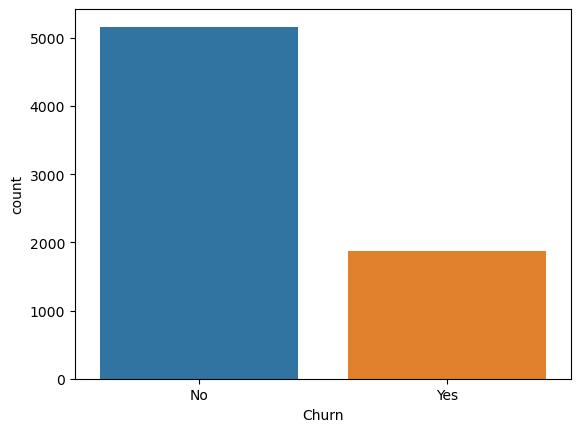

In [92]:
sns.countplot(df, x='Churn')

<Axes: xlabel='Contract', ylabel='count'>

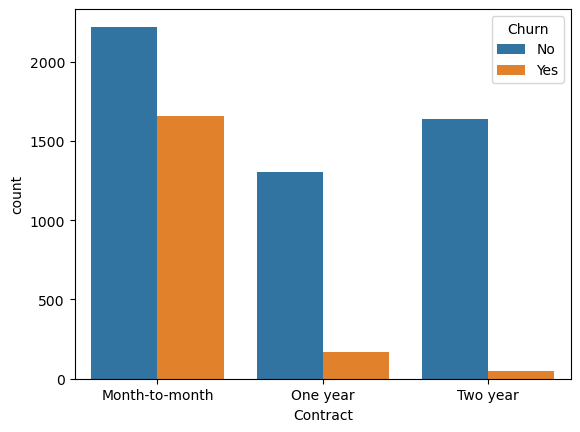

In [93]:
sns.countplot(data=df, x="Contract",hue="Churn")

<Axes: xlabel='PaymentMethod', ylabel='count'>

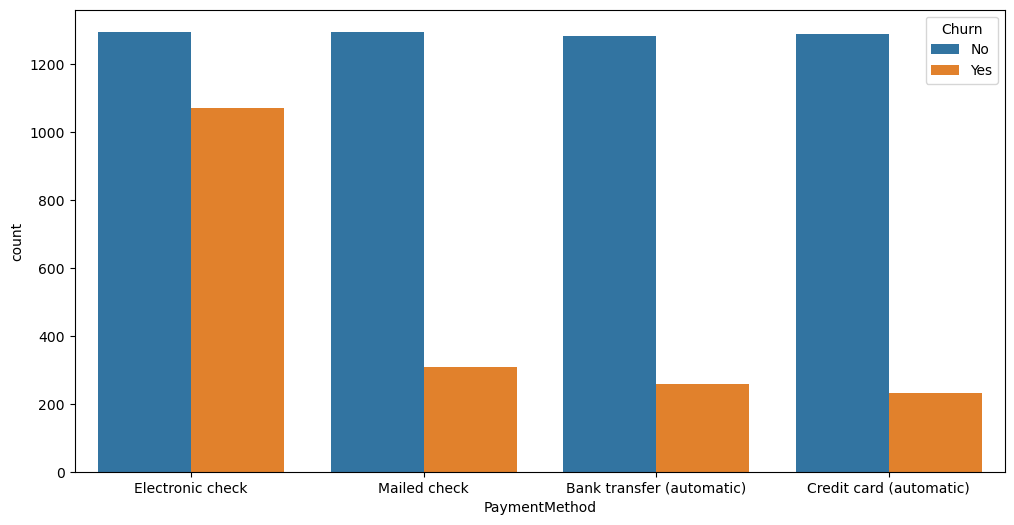

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="PaymentMethod",hue="Churn")

<Axes: xlabel='Partner', ylabel='count'>

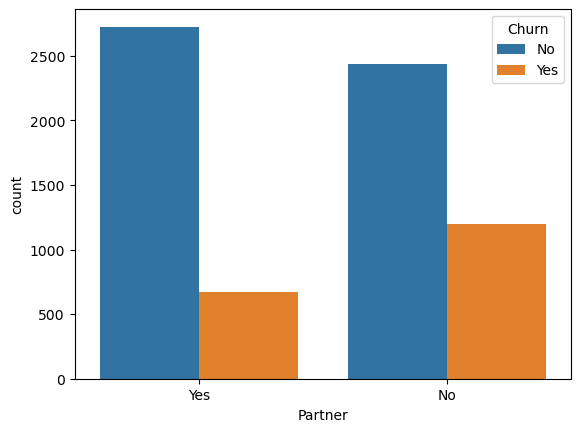

In [95]:
sns.countplot(data=df, x="Partner",hue="Churn")

/Users/brandonkwamou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


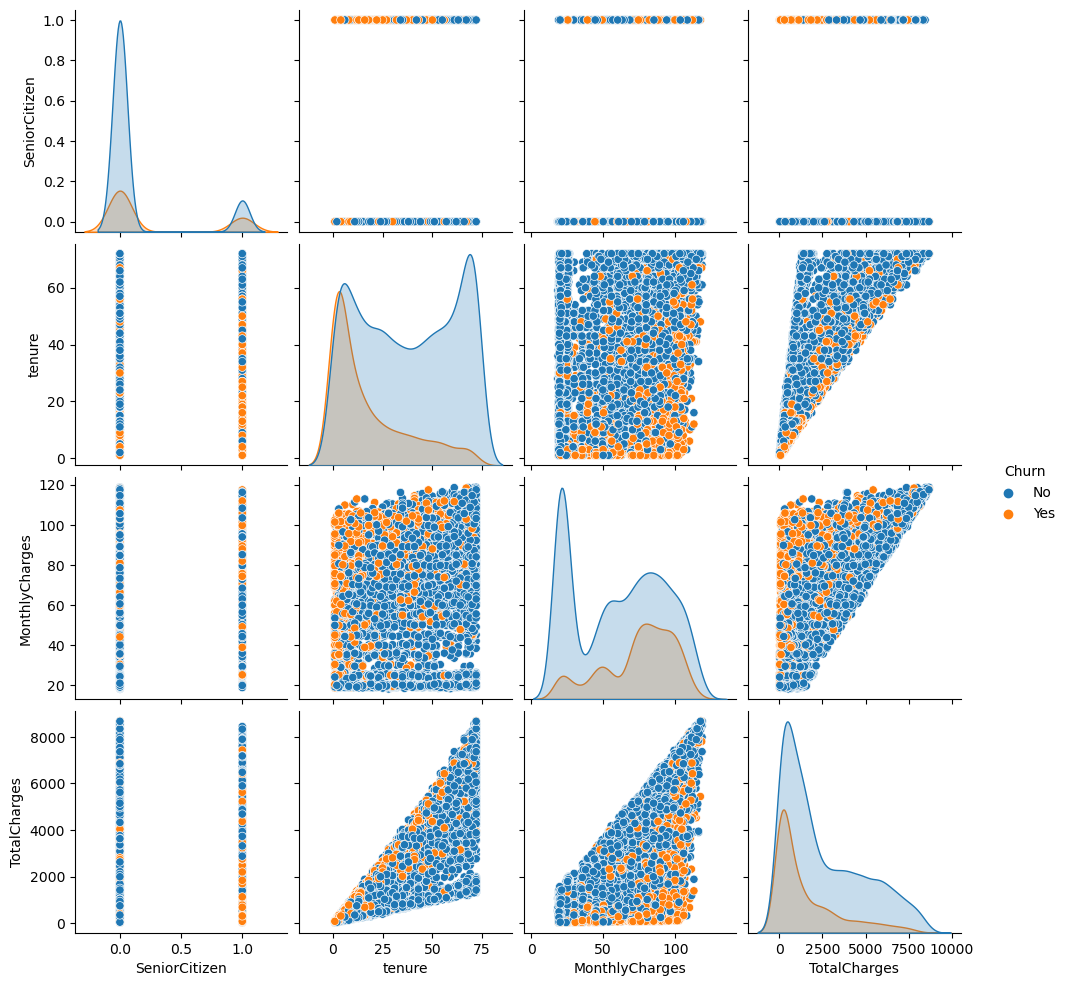

In [96]:
sns.pairplot(data=df,hue="Churn")

/Users/brandonkwamou/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


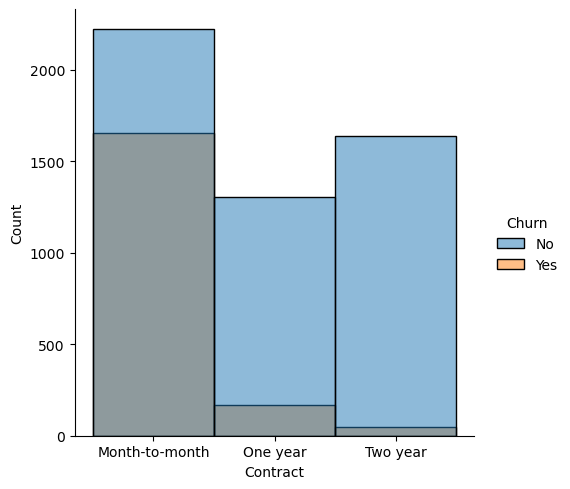

In [97]:
sns.displot(df,x="Contract",hue="Churn")

## Data Preparation

In [98]:
df['Churn'] = df['Churn'].map({"No":0, "Yes":1})

<Axes: >

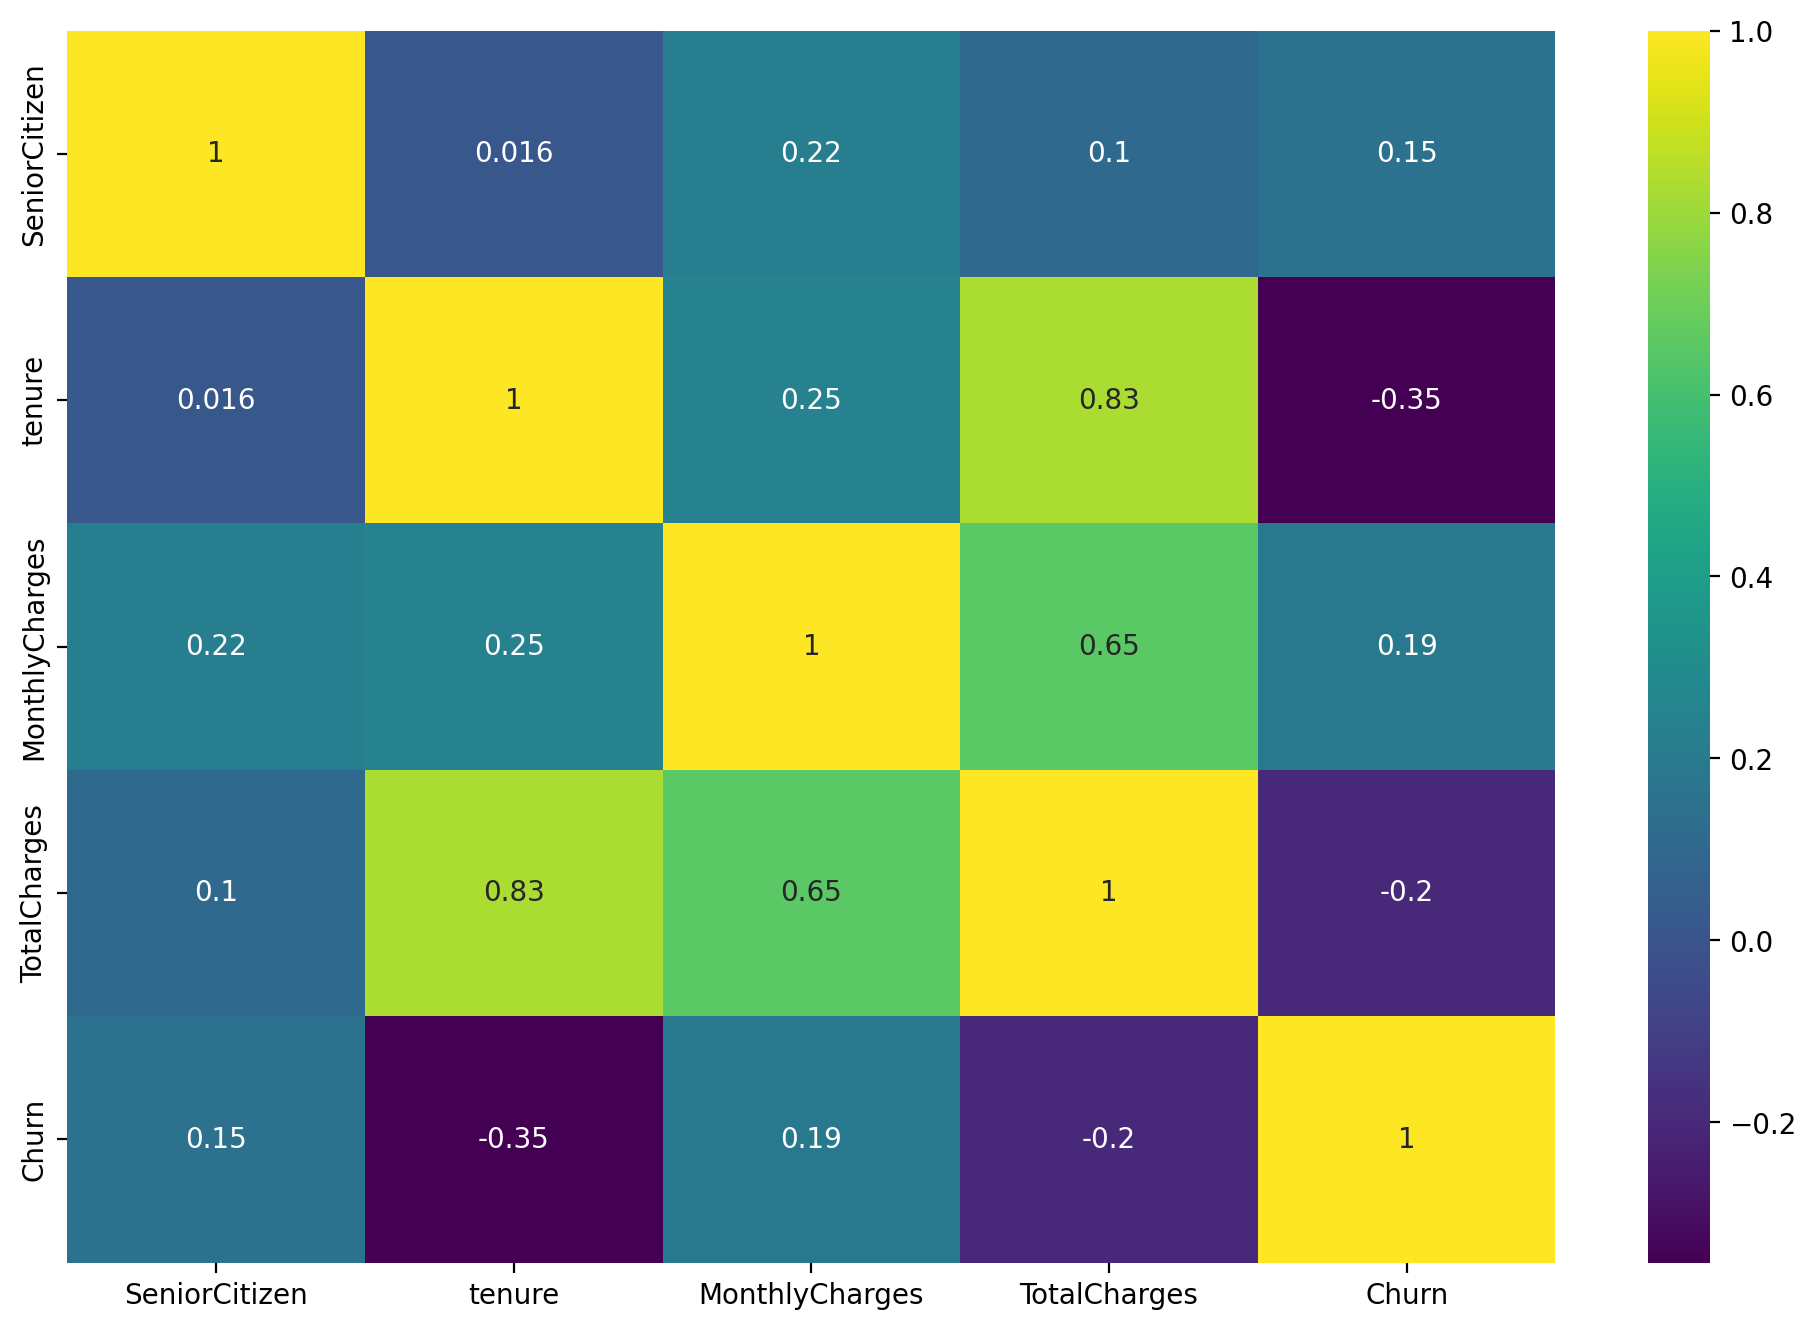

In [99]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.select_dtypes(exclude=object).corr(),annot=True,cmap='viridis')

In [100]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [101]:
df['Partner'] = df['Partner'].map({"Yes":1,"No":0})
df['Dependents'] =  df['Dependents'].map({"Yes":1,"No":0})
df['PhoneService'] =  df['PhoneService'].map({"Yes":1,"No":0})
df['PaperlessBilling'] =  df['PaperlessBilling'].map({"Yes":1,"No":0})

In [102]:
df = pd.get_dummies(df, columns=['gender','InternetService','Contract','PaymentMethod'])

<Axes: >

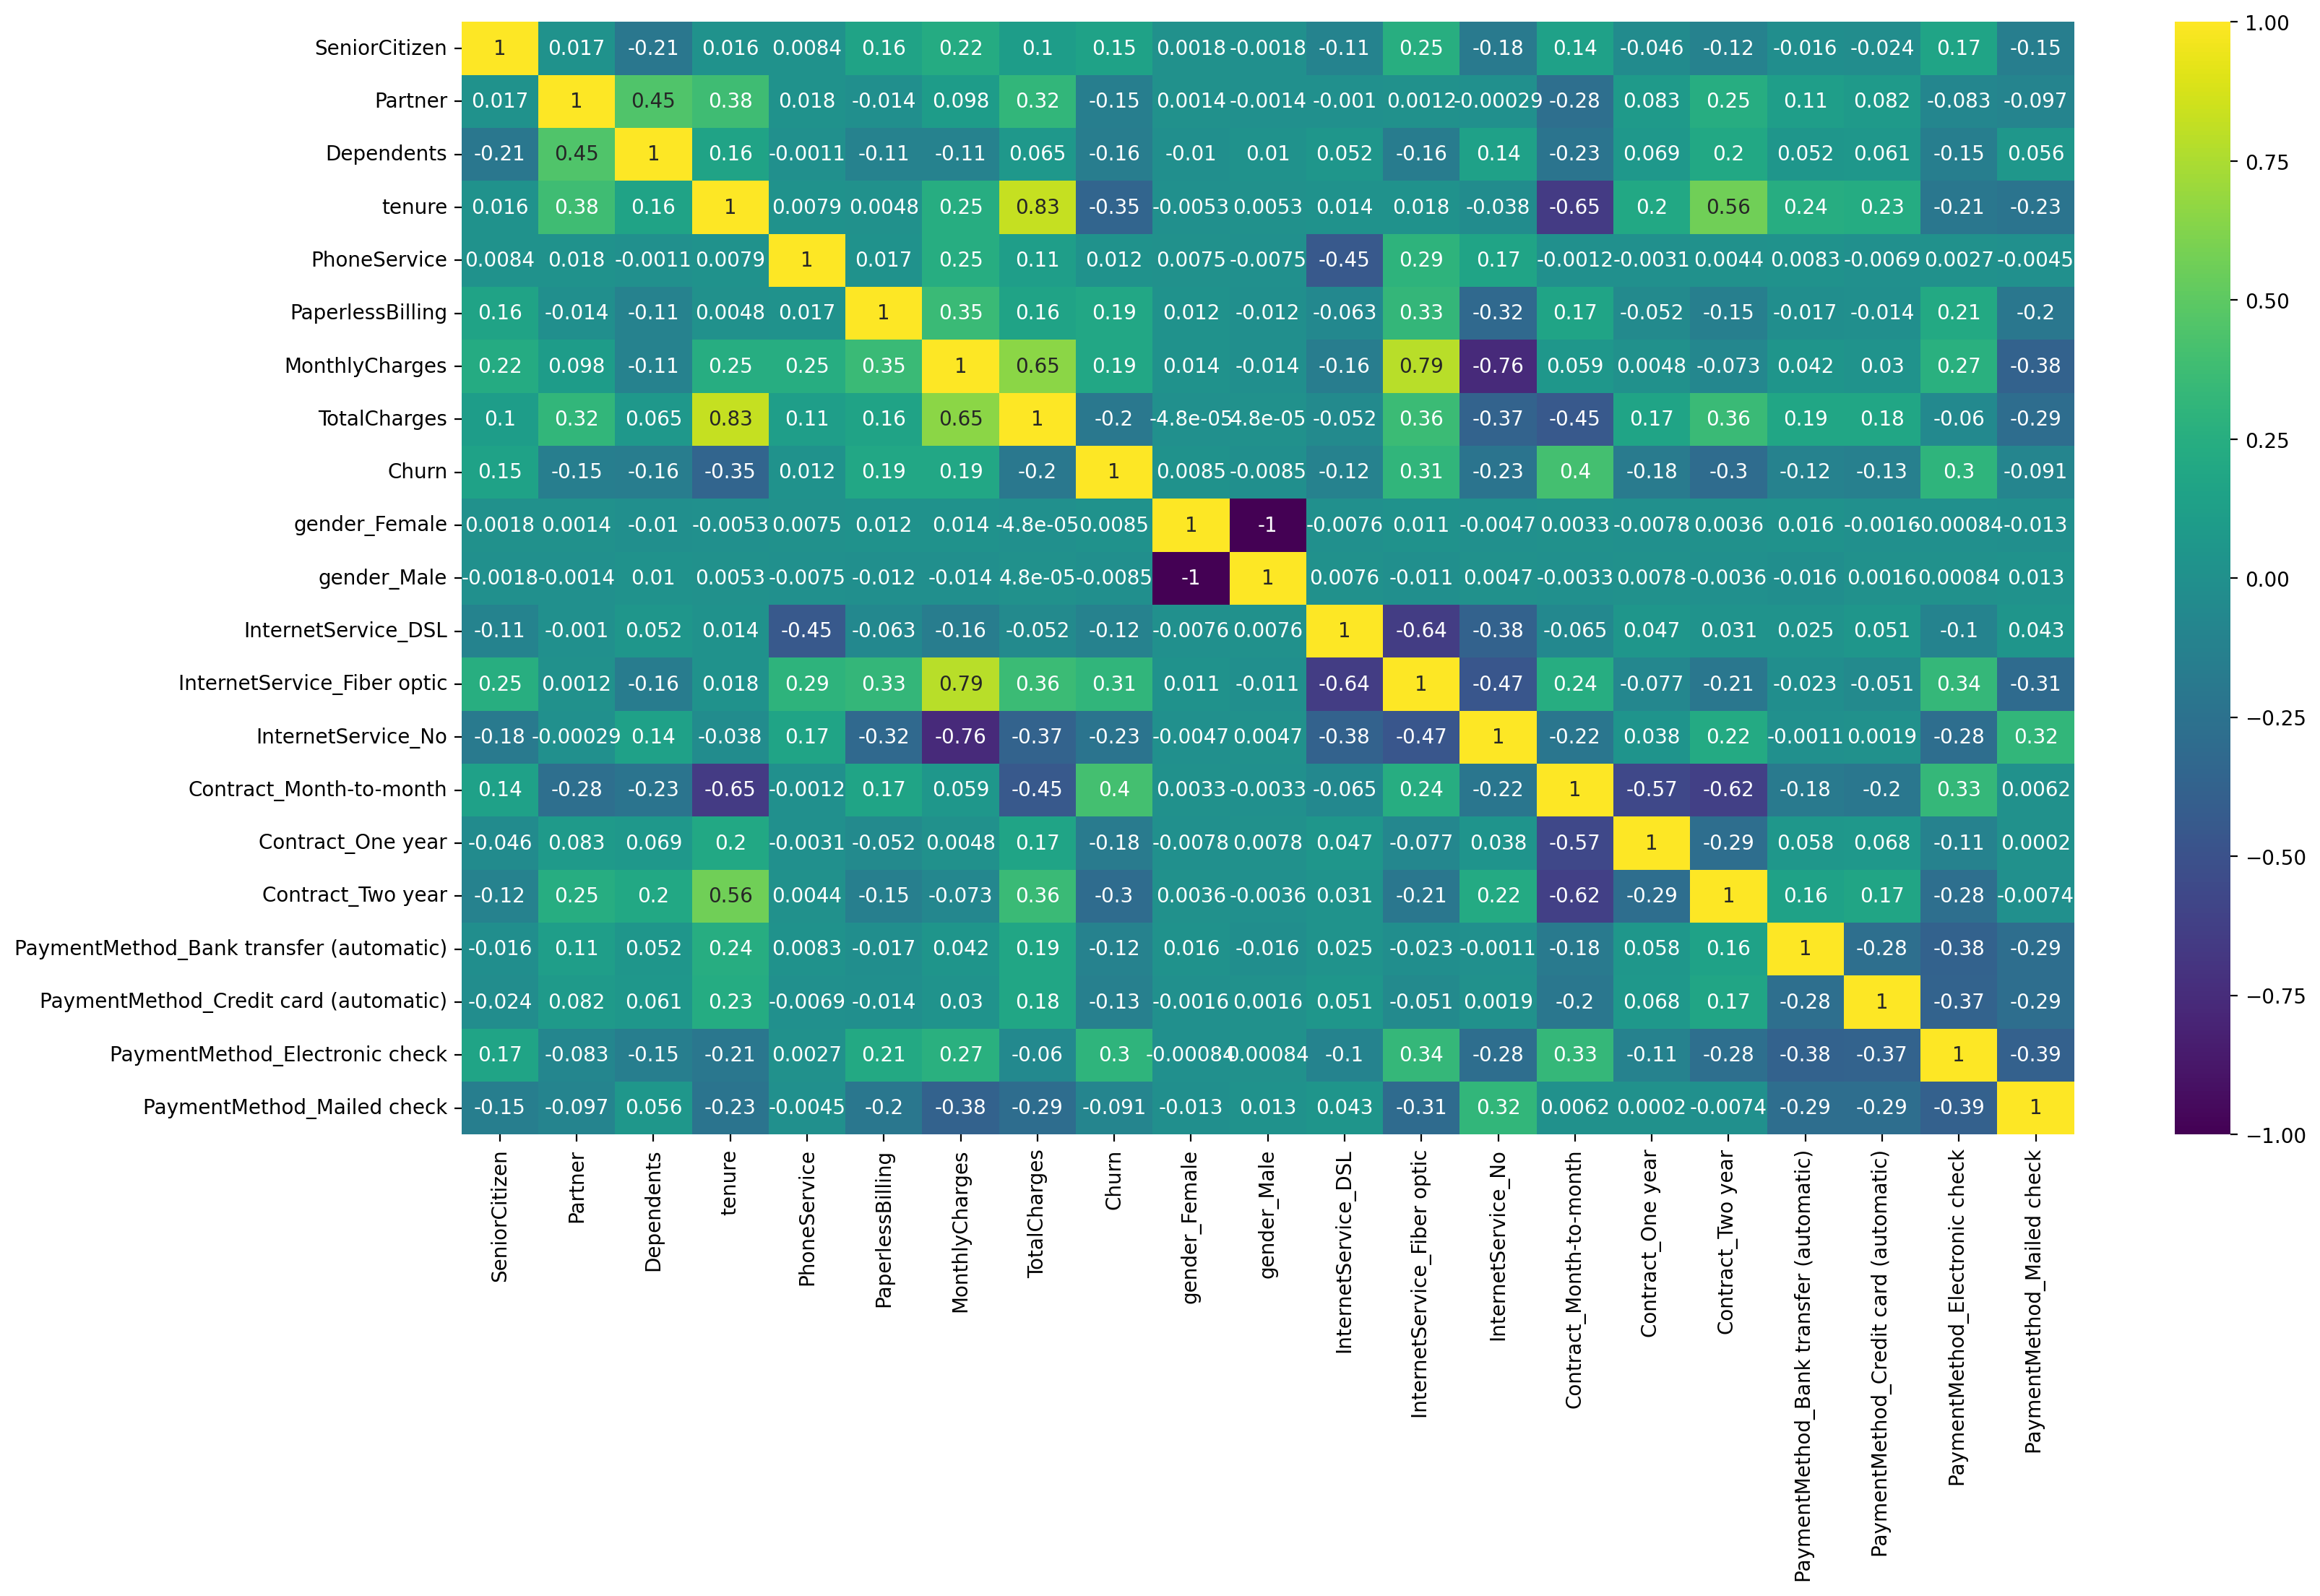

In [103]:
plt.figure(figsize=(18,10),dpi=200)
sns.heatmap(df.select_dtypes(exclude=object).corr(),annot=True,cmap='viridis')

## Train | Test Split

In [104]:
X = pd.get_dummies(df.drop('Churn',axis=1))

In [105]:
y = df['Churn']

In [106]:
from sklearn.model_selection import train_test_split

In [110]:
from sklearn.preprocessing import StandardScaler

In [107]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [115]:
scaler = StandardScaler()

In [132]:
scaled_X_train = scaler.fit_transform(X_train)

In [133]:
scaled_X_test = scaler.transform(X_test)

# Models

In [108]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [121]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    preds = model.predict(X_test)
    
    # show results
    ConfusionMatrixDisplay.from_predictions(y_test,preds)
    print(classification_report(y_test,preds))

In [111]:
from sklearn.model_selection import GridSearchCV

In [113]:
from sklearn.pipeline import Pipeline

### Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegressionCV

In [130]:
log_model = LogisticRegressionCV(class_weight='balanced')

              precision    recall  f1-score   support

           0       0.91      0.74      0.81      1580
           1       0.50      0.77      0.61       530

    accuracy                           0.75      2110
   macro avg       0.70      0.76      0.71      2110
weighted avg       0.80      0.75      0.76      2110



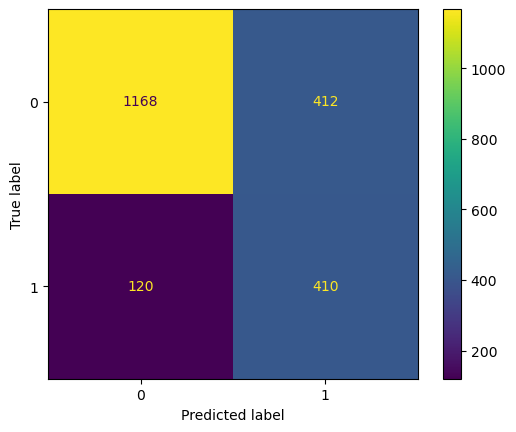

In [134]:
run_model(log_model, scaled_X_train,y_train,scaled_X_test,y_test)

### KNN Classifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
k_values = np.arange(1,30)
param_grid = {'knn__n_neighbors':k_values}

In [116]:
knn = KNeighborsClassifier()

In [117]:
pipe = Pipeline([('scaler',scaler),('knn',knn)])

In [118]:
knn_model = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1580
           1       0.57      0.52      0.54       530

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.78      0.78      0.78      2110



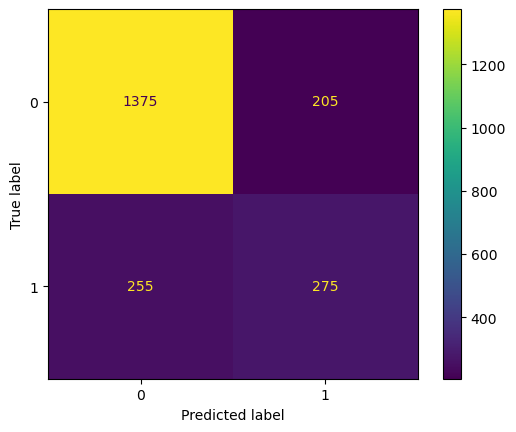

In [122]:
run_model(knn_model,X_train,y_train,X_test,y_test)

## SVM

In [123]:
from sklearn.svm import SVC

In [136]:
model = SVC(class_weight='balanced')

In [137]:
param_grid = param_grid = {'C':[.001,.01,.1,.5,1,2],
              'kernel':['rbf','poly','sigmoid','linear'],
              'gamma':['scale','auto'] }

In [138]:
svc_model = GridSearchCV(model,param_grid)

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1580
           1       0.46      0.77      0.58       530

    accuracy                           0.72      2110
   macro avg       0.68      0.74      0.68      2110
weighted avg       0.79      0.72      0.74      2110



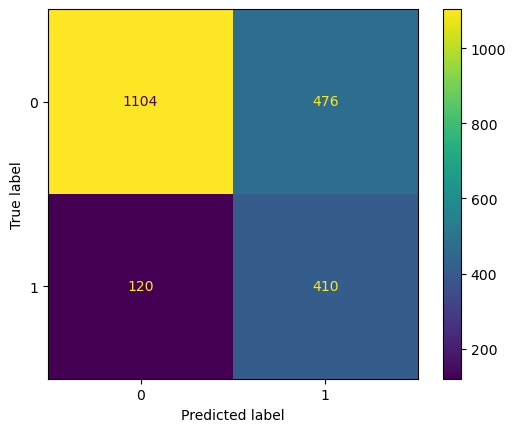

In [140]:
run_model(svc_model,scaled_X_train,y_train,scaled_X_test,y_test)

## Random Forests Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
model = RandomForestClassifier(class_weight="balanced")

In [176]:
param_grid = {'n_estimators': [10,30,64,100,128,200],
              'max_features': np.arange(1,15)}

In [177]:
rfc_model = GridSearchCV(model, param_grid)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.63      0.50      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



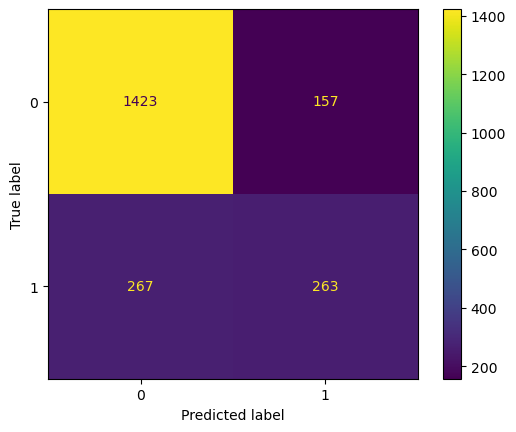

In [178]:
run_model(rfc_model,X_train,y_train,X_test,y_test)

## Boosted Methods Classifier

**Ada Boosting**

In [179]:
from sklearn.ensemble import AdaBoostClassifier

In [180]:
model = AdaBoostClassifier()

In [181]:
len(X.columns)

41

In [182]:
param_grid = {'n_estimators': np.arange(1,42)}

In [183]:
ada_model = GridSearchCV(model, param_grid, scoring='accuracy')

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1580
           1       0.64      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.81      2110



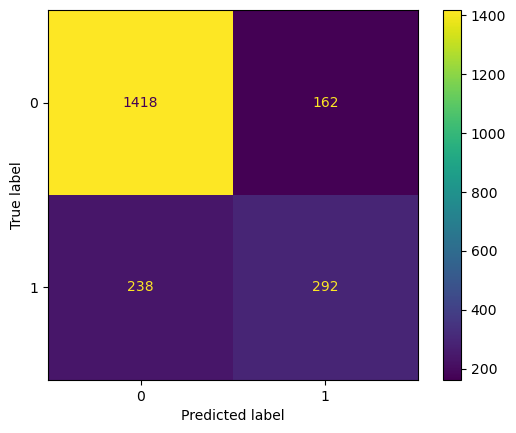

In [184]:
run_model(model, X_train,y_train,X_test,y_test)

**Gradient Boosting**

In [185]:
from sklearn.ensemble import GradientBoostingClassifier

In [186]:
model = GradientBoostingClassifier()

In [190]:
param_grid = {'n_estimators':[10,30,64,100,128,200],
             'learning_rate':[.001,.05,.1,.2],
             'max_depth':np.arange(1,10)}

In [191]:
grad_model = GridSearchCV(model, param_grid, scoring='accuracy')

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.65      0.51      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



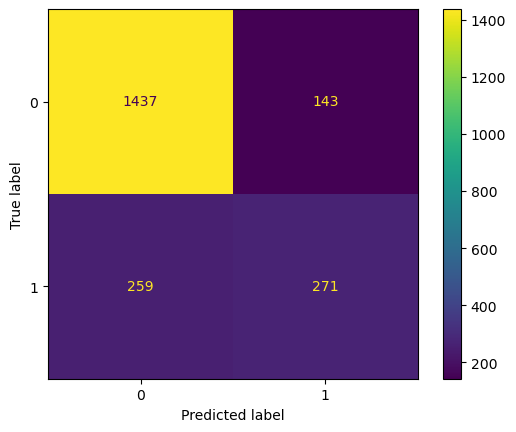

In [192]:
run_model(grad_model, X_train, y_train, X_test, y_test)